# Homework_1
## Real Time Machine Learning
### Authors: Mark McAfoose

In [1]:
import torch
from torchvision import transforms
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
dtype = np.float64

Text(0.5, 1.0, 'Red 3')

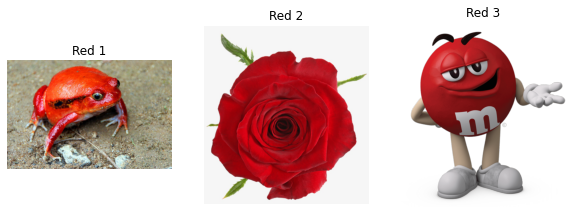

In [2]:
R1 = Image.open("Red1.jpg")
R2 = Image.open("Red2.jpg")
R3 = Image.open("Red3.jpg")
fig = plt.figure(figsize=(10, 100))
rows = 3
columns = 3
fig.add_subplot(rows, columns, 1)
plt.imshow(R1)
plt.axis('off')
plt.title("Red 1")
  
fig.add_subplot(rows, columns, 2)
plt.imshow(R2)
plt.axis('off')
plt.title("Red 2")
  
fig.add_subplot(rows, columns, 3)
plt.imshow(R3)
plt.axis('off')
plt.title("Red 3")

Text(0.5, 1.0, 'Blue 3')

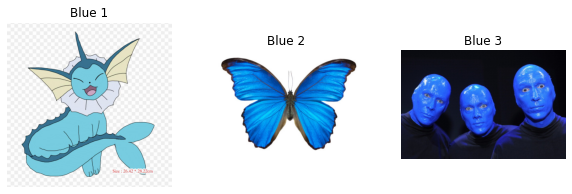

In [3]:
B1= Image.open("Blue1.jpg")
B2 = Image.open("Blue2.jpg")
B3 = Image.open("Blue3.jpg")
fig = plt.figure(figsize=(10, 100))
rows = 3
columns = 3
fig.add_subplot(rows, columns, 4)
plt.imshow(B1)
plt.axis('off')
plt.title("Blue 1")
  
fig.add_subplot(rows, columns, 5)
plt.imshow(B2)
plt.axis('off')
plt.title("Blue 2")
  
fig.add_subplot(rows, columns, 6)
plt.imshow(B3)
plt.axis('off')
plt.title("Blue 3")

Text(0.5, 1.0, 'Green 3')

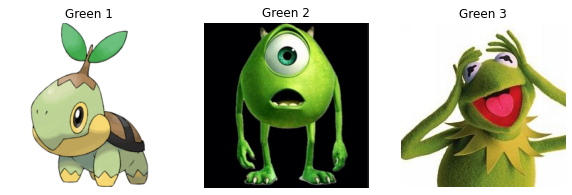

In [4]:
G1= Image.open("Green1.jpg")
G2 = Image.open("Green2.jpg")
G3 = Image.open("Green3.jpg")
fig = plt.figure(figsize=(10, 100))
rows = 3
columns = 3
fig.add_subplot(rows, columns, 4)
plt.imshow(G1)
plt.axis('off')
plt.title("Green 1")
  
fig.add_subplot(rows, columns, 5)
plt.imshow(G2)
plt.axis('off')
plt.title("Green 2")
  
fig.add_subplot(rows, columns, 6)
plt.imshow(G3)
plt.axis('off')
plt.title("Green 3")

In [5]:
#Tensor Transormation
transform = transforms.ToTensor()
RT1 = transform(R1)
RT2 = transform(R2)
RT3 = transform(R3)
BT1 = transform(B1)
BT2 = transform(B2)
BT3 = transform(B3)
GT1 = transform(G1)
GT2 = transform(G2)
GT3 = transform(G3)

#Taking the means of tensors
m1 = torch.mean(RT1)
m2 = torch.mean(RT2)
m3 = torch.mean(RT3)
m4 = torch.mean(BT1)
m5 = torch.mean(BT2)
m6 = torch.mean(BT3)
m7 = torch.mean(GT1)
m8 = torch.mean(GT2)
m9 = torch.mean(GT3)

#Printing of means
print("Red Mean 1: ", m1)
print("Red Mean 2: ", m2)
print("Red Mean 3: ", m3)
print("Blue Mean 1: ", m1)
print("Blue Mean 2: ", m2)
print("Blue Mean 3: ", m3)
print("Green Mean 1: ", m1)
print("Green Mean 2: ", m2)
print("Green Mean 3: ", m3)

Red Mean 1:  tensor(0.5107)
Red Mean 2:  tensor(0.5851)
Red Mean 3:  tensor(0.2743)
Blue Mean 1:  tensor(0.5107)
Blue Mean 2:  tensor(0.5851)
Blue Mean 3:  tensor(0.2743)
Green Mean 1:  tensor(0.5107)
Green Mean 2:  tensor(0.5851)
Green Mean 3:  tensor(0.2743)


In [6]:
#Channel means
m1 = torch.mean(RT1, (1,2))
print("Red Mean 1: ", m1)
m2 = torch.mean(RT2, (1,2))
print("Red Mean 2: ", m2)
m3 = torch.mean(RT3, (1,2))
print("Red Mean 3: ", m3)

m4 = torch.mean(BT1, (1,2))
print("Blue Mean 1: ", m4)
m5 = torch.mean(BT2, (1,2))
print("Blue Mean 2: ", m5)
m6 = torch.mean(BT3, (1,2))
print("Blue Mean 3: ", m6)

m7 = torch.mean(GT1, (1,2))
print("Green Mean 1: ", m7)
m8 = torch.mean(GT2, (1,2))
print("Green Mean 2: ", m8)
m9 = torch.mean(GT3, (1,2))
print("Green Mean 3: ", m9)

Red Mean 1:  tensor([0.6314, 0.4928, 0.4080])
Red Mean 2:  tensor([0.7822, 0.4794, 0.4937])
Red Mean 3:  tensor([0.2992, 0.1993, 0.1984, 0.4003])
Blue Mean 1:  tensor([0.8040, 0.8815, 0.8994])
Blue Mean 2:  tensor([0.6344, 0.7822, 0.8934])
Blue Mean 3:  tensor([0.1017, 0.1593, 0.3396])
Green Mean 1:  tensor([0.8486, 0.8667, 0.7881, 1.0000])
Green Mean 2:  tensor([0.1590, 0.2320, 0.1004])
Green Mean 3:  tensor([0.7272, 0.7126, 0.5695])


In [7]:
#QUESTION 2

def model(t_u, w1, w2, b):
    return w2*pow((t_u),2)+(w1*t_u)+b
def loss_fn(t_p, t_c):
    squared_diffs = pow((t_p - t_c),2)
    return squared_diffs.mean()
def dmodel_dw1(t_u, w1, w2, b):
    return t_u
def dmodel_dw2(t_u, w1, w2, b):
    return t_u
def dmodel_db(t_u, w1, w2, b):
    return 1
def dloss_fn(t_p, t_c):
    dsq_diffs = (2 * (t_p - t_c)) / t_p.size(0)
    return dsq_diffs
def grad_fn(t_u, t_c, t_p, w1, w2, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, w2, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w1, w2, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w1, w2, b)
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])
#Training loop:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w1, w2, b = params
        t_p = model(t_u, w1, w2, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w1, w2, b)

        params = params - learning_rate * grad
        
        if epoch == 1:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
     
    return params

t_c = np.array([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = np.array([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

w = torch.ones(())
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())

In [8]:
t_un = 0.1 * t_u
learn_rate = 0.0046
print("Non-linear Results for the following learning rate: ", learn_rate)
params = training_loop(n_epochs = 5000, 
                       learning_rate = learn_rate, 
                       params = torch.tensor([1, 1, 0]), 
                       t_u = t_un, 
                       t_c = t_c);

Non-linear Results for the following learning rate:  0.0046
Epoch 1, Loss 675.794089
Epoch 500, Loss 4.416167
Epoch 1000, Loss 2.949554
Epoch 1500, Loss 2.576488
Epoch 2000, Loss 2.491918
Epoch 2500, Loss 2.478761
Epoch 3000, Loss 2.480645
Epoch 3500, Loss 2.484119
Epoch 4000, Loss 2.486651
Epoch 4500, Loss 2.488185
Epoch 5000, Loss 2.489051


In [9]:
def model(t_u, w, b):
  return w * t_u + b

def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

def dloss_fn(t_p, t_c):
  dsq_diffs = 2 * (t_p - t_c) / t_p.size(0)
  return dsq_diffs

def dmodel_dw(t_u, w, b):
  return t_u

def dmodel_db(t_u, w, b):
  return 1.0

def grad_fn(t_u, t_c, t_p, w, b):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
  dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
  return torch.stack([dloss_dw.sum(), dloss_db.sum()])
 
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    w, b = params

    t_p = model(t_u, w, b)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn(t_u, t_c, t_p, w, b)

    params = params - learning_rate * grad
    if epoch % 500 == 0:
      print("Epoch %d, Loss %f" %(epoch, float(loss)))
  return params

Epoch 500, Loss 7.860115
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927680
Epoch 4500, Loss 2.927651
Epoch 5000, Loss 2.927648


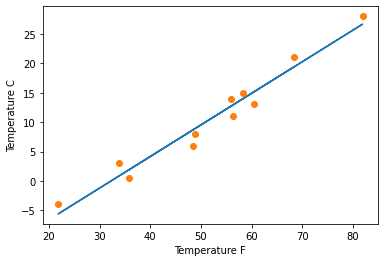

In [10]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_un = 0.1 * t_u
params = training_loop(
n_epochs = 5000,
learning_rate = 1e-2,
params = torch.tensor([1.0, 0.0]),
t_u = t_un,
t_c = t_c)

# Plot datapoints and the paramters
from matplotlib import pyplot as plt

t_p = model(t_un, *params)

fig = plt.figure()
plt.xlabel("Temperature F")
plt.ylabel("Temperature C")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [11]:
def model_non_lin(t_u, w1, w2, b):
  return w2 * t_u ** 2 + w1 * t_u + b

def dmodel_dw1(t_u, w1, w2, b):
	return t_u

def dmodel_dw2(t_u, w1, w2, b):
  return t_u**2

def dmodel_db_non_lin(t_u, w1, w2, b):
	return 1.0

def grad_fn_non_lin(t_u, t_c, t_p, w1, w2, b):
  dloss_dtp = dloss_fn(t_p, t_c)
  dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, w2, b)
  dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w1, w2, b)
  dloss_db = dloss_dtp * dmodel_db_non_lin(t_u, w1, w2, b)
  return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])

def training_loop_non_lin(n_epochs, learning_rate, params, t_u, t_c):
  for epoch in range(1, n_epochs + 1):
    w1, w2, b = params

    t_p = model_non_lin(t_u, w1, w2, b)
    loss = loss_fn(t_p, t_c)
    grad = grad_fn_non_lin(t_u, t_c, t_p, w1, w2, b)
    params = params - learning_rate * grad
    
    if epoch % 500 == 0:
      print("Epoch %d, Loss %f" %(epoch, float(loss)))
  return params

Epoch 500, Loss 10.708597
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123476
Epoch 2500, Loss 5.377228
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465787
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


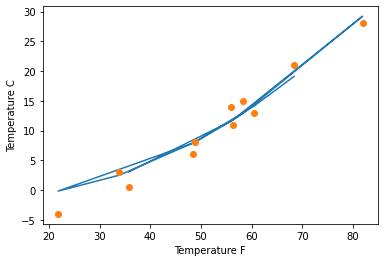

In [12]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_un = 0.1 * t_u
params = training_loop_non_lin(
n_epochs = 5000,
learning_rate = 1e-4,
params = torch.tensor([1.0, 1.0, 0.0]),
t_u = t_un,
t_c = t_c)

# Plot datapoints and the paramters
from matplotlib import pyplot as plt

t_p = model_non_lin(t_un, *params)

fig = plt.figure()
plt.xlabel("Temperature F")
plt.ylabel("Temperature C")
plt.plot(t_u.numpy(), t_p.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o')

In [13]:
#QUESTION 3

#load dataset and extract desired parameters
housing = pd.read_csv("Housing.csv")
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
raw_data = housing[num_vars] 
raw_data.head() 

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [14]:
#Preprocess the data
scalar = StandardScaler()
data = scalar.fit_transform(raw_data)
print(data)

raw_area = torch.tensor(raw_data.iloc[:,0].values)
raw_bedrooms = torch.tensor(raw_data.iloc[:,1].values)
raw_bathrooms = torch.tensor(raw_data.iloc[:,2].values)
raw_stories = torch.tensor(raw_data.iloc[:,3].values)
raw_parking = torch.tensor(raw_data.iloc[:,4].values)
raw_price = torch.tensor(raw_data.iloc[:,5].values)

area = torch.tensor(data[:,0])
bedrooms = torch.tensor(data[:,1])
bathrooms = torch.tensor(data[:,2])
stories = torch.tensor(data[:,3])
parking = torch.tensor(data[:,4])
price = torch.tensor(data[:,5])

w1 = torch.ones(())
w2 = torch.ones(())
w3 = torch.ones(())
w4 = torch.ones(())
w5 = torch.ones(())
b = torch.zeros(())

[[ 1.04672629  1.40341936  1.42181174  1.37821692  1.51769249  4.56636513]
 [ 1.75700953  1.40341936  5.40580863  2.53202371  2.67940935  4.00448405]
 [ 2.21823241  0.04727831  1.42181174  0.22441013  1.51769249  4.00448405]
 ...
 [-0.70592066 -1.30886273 -0.57018671 -0.92939666 -0.80574124 -1.61432675]
 [-1.03338891  0.04727831 -0.57018671 -0.92939666 -0.80574124 -1.61432675]
 [-0.5998394   0.04727831 -0.57018671  0.22441013 -0.80574124 -1.61432675]]


In [15]:
def model(area, bedrooms, bathrooms, stories, parking, w1, w2, w3, w4, w5, b):
    return (area*w1) + (bedrooms*w2) + (bathrooms*w3) + (stories*w4) + (parking*w5) + b
def loss_fn(t_p, price):
    squared_diffs = pow((t_p - price),2)
    return squared_diffs.mean()
def dmodel_dw1(area, w1, b):
    return area
def dmodel_dw2(bedrooms, w2, b):
    return bedrooms
def dmodel_dw3(bathrooms, w3, b):
    return bathrooms
def dmodel_dw4(stories, w4, b):
    return stories
def dmodel_dw5(parking, w5, b):
    return parking
def dmodel_db(area, bedrooms, bathrooms, stories, parking, w1, w2, w3, w4, w5, b):
    return 1
def dloss_fn(t_p, price):
    dsq_diffs = (2 * (t_p - price)) / t_p.size(0)
    return dsq_diffs
def grad_fn(area, bedrooms, bathrooms, stories, parking, price, t_p, w1, w2, w3, w4, w5, b):
    dloss_dtp = dloss_fn(t_p, price)
    dloss_dw1 = dloss_dtp * dmodel_dw1(area, w1, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(bedrooms, w2, b)
    dloss_dw3 = dloss_dtp * dmodel_dw2(bathrooms, w3, b)
    dloss_dw4 = dloss_dtp * dmodel_dw2(stories, w4, b)
    dloss_dw5 = dloss_dtp * dmodel_dw2(parking, w5, b)
    dloss_db = dloss_dtp * dmodel_db(area, bedrooms, bathrooms, stories, parking, w1, w2, w3, w4, w5, b)
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_dw3.sum(), dloss_dw4.sum(), dloss_dw5.sum(), dloss_db.sum()])
def training_loop(n_epochs, learning_rate, params, area, bedrooms, bathrooms, stories, parking, price):
    loss_hist = np.zeros(n_epochs+1)
    for epoch in range(1, n_epochs + 1):
        w1, w2, w3, w4, w5, b = params
        t_p = model(area, bedrooms, bathrooms, stories, parking, w1, w2, w3, w4, w5, b)
        loss = loss_fn(t_p, price)
        loss_hist[epoch] = float(loss)       
        grad = grad_fn(area, bedrooms, bathrooms, stories, parking, price, t_p, w1, w2, w3, w4, w5, b)
        params = params - learning_rate * grad
        
        if epoch == 1:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
     
    return params, loss_hist

In [16]:
learn_rate = 0.1
print("Linear results for the following learning rate: ", learn_rate)
params, loss = training_loop(n_epochs = 5000, 
                             learning_rate = learn_rate, 
                             params = torch.tensor([1, 1, 1, 1, 1, 0]), 
                             area = area, 
                             bedrooms = bedrooms, 
                             bathrooms = bathrooms, 
                             stories = stories, 
                             parking = parking, 
                             price = price);

Linear results for the following learning rate:  0.1
Epoch 1, Loss 6.056968
Epoch 500, Loss 0.438417
Epoch 1000, Loss 0.438417
Epoch 1500, Loss 0.438417
Epoch 2000, Loss 0.438417
Epoch 2500, Loss 0.438417
Epoch 3000, Loss 0.438417
Epoch 3500, Loss 0.438417
Epoch 4000, Loss 0.438417
Epoch 4500, Loss 0.438417
Epoch 5000, Loss 0.438417


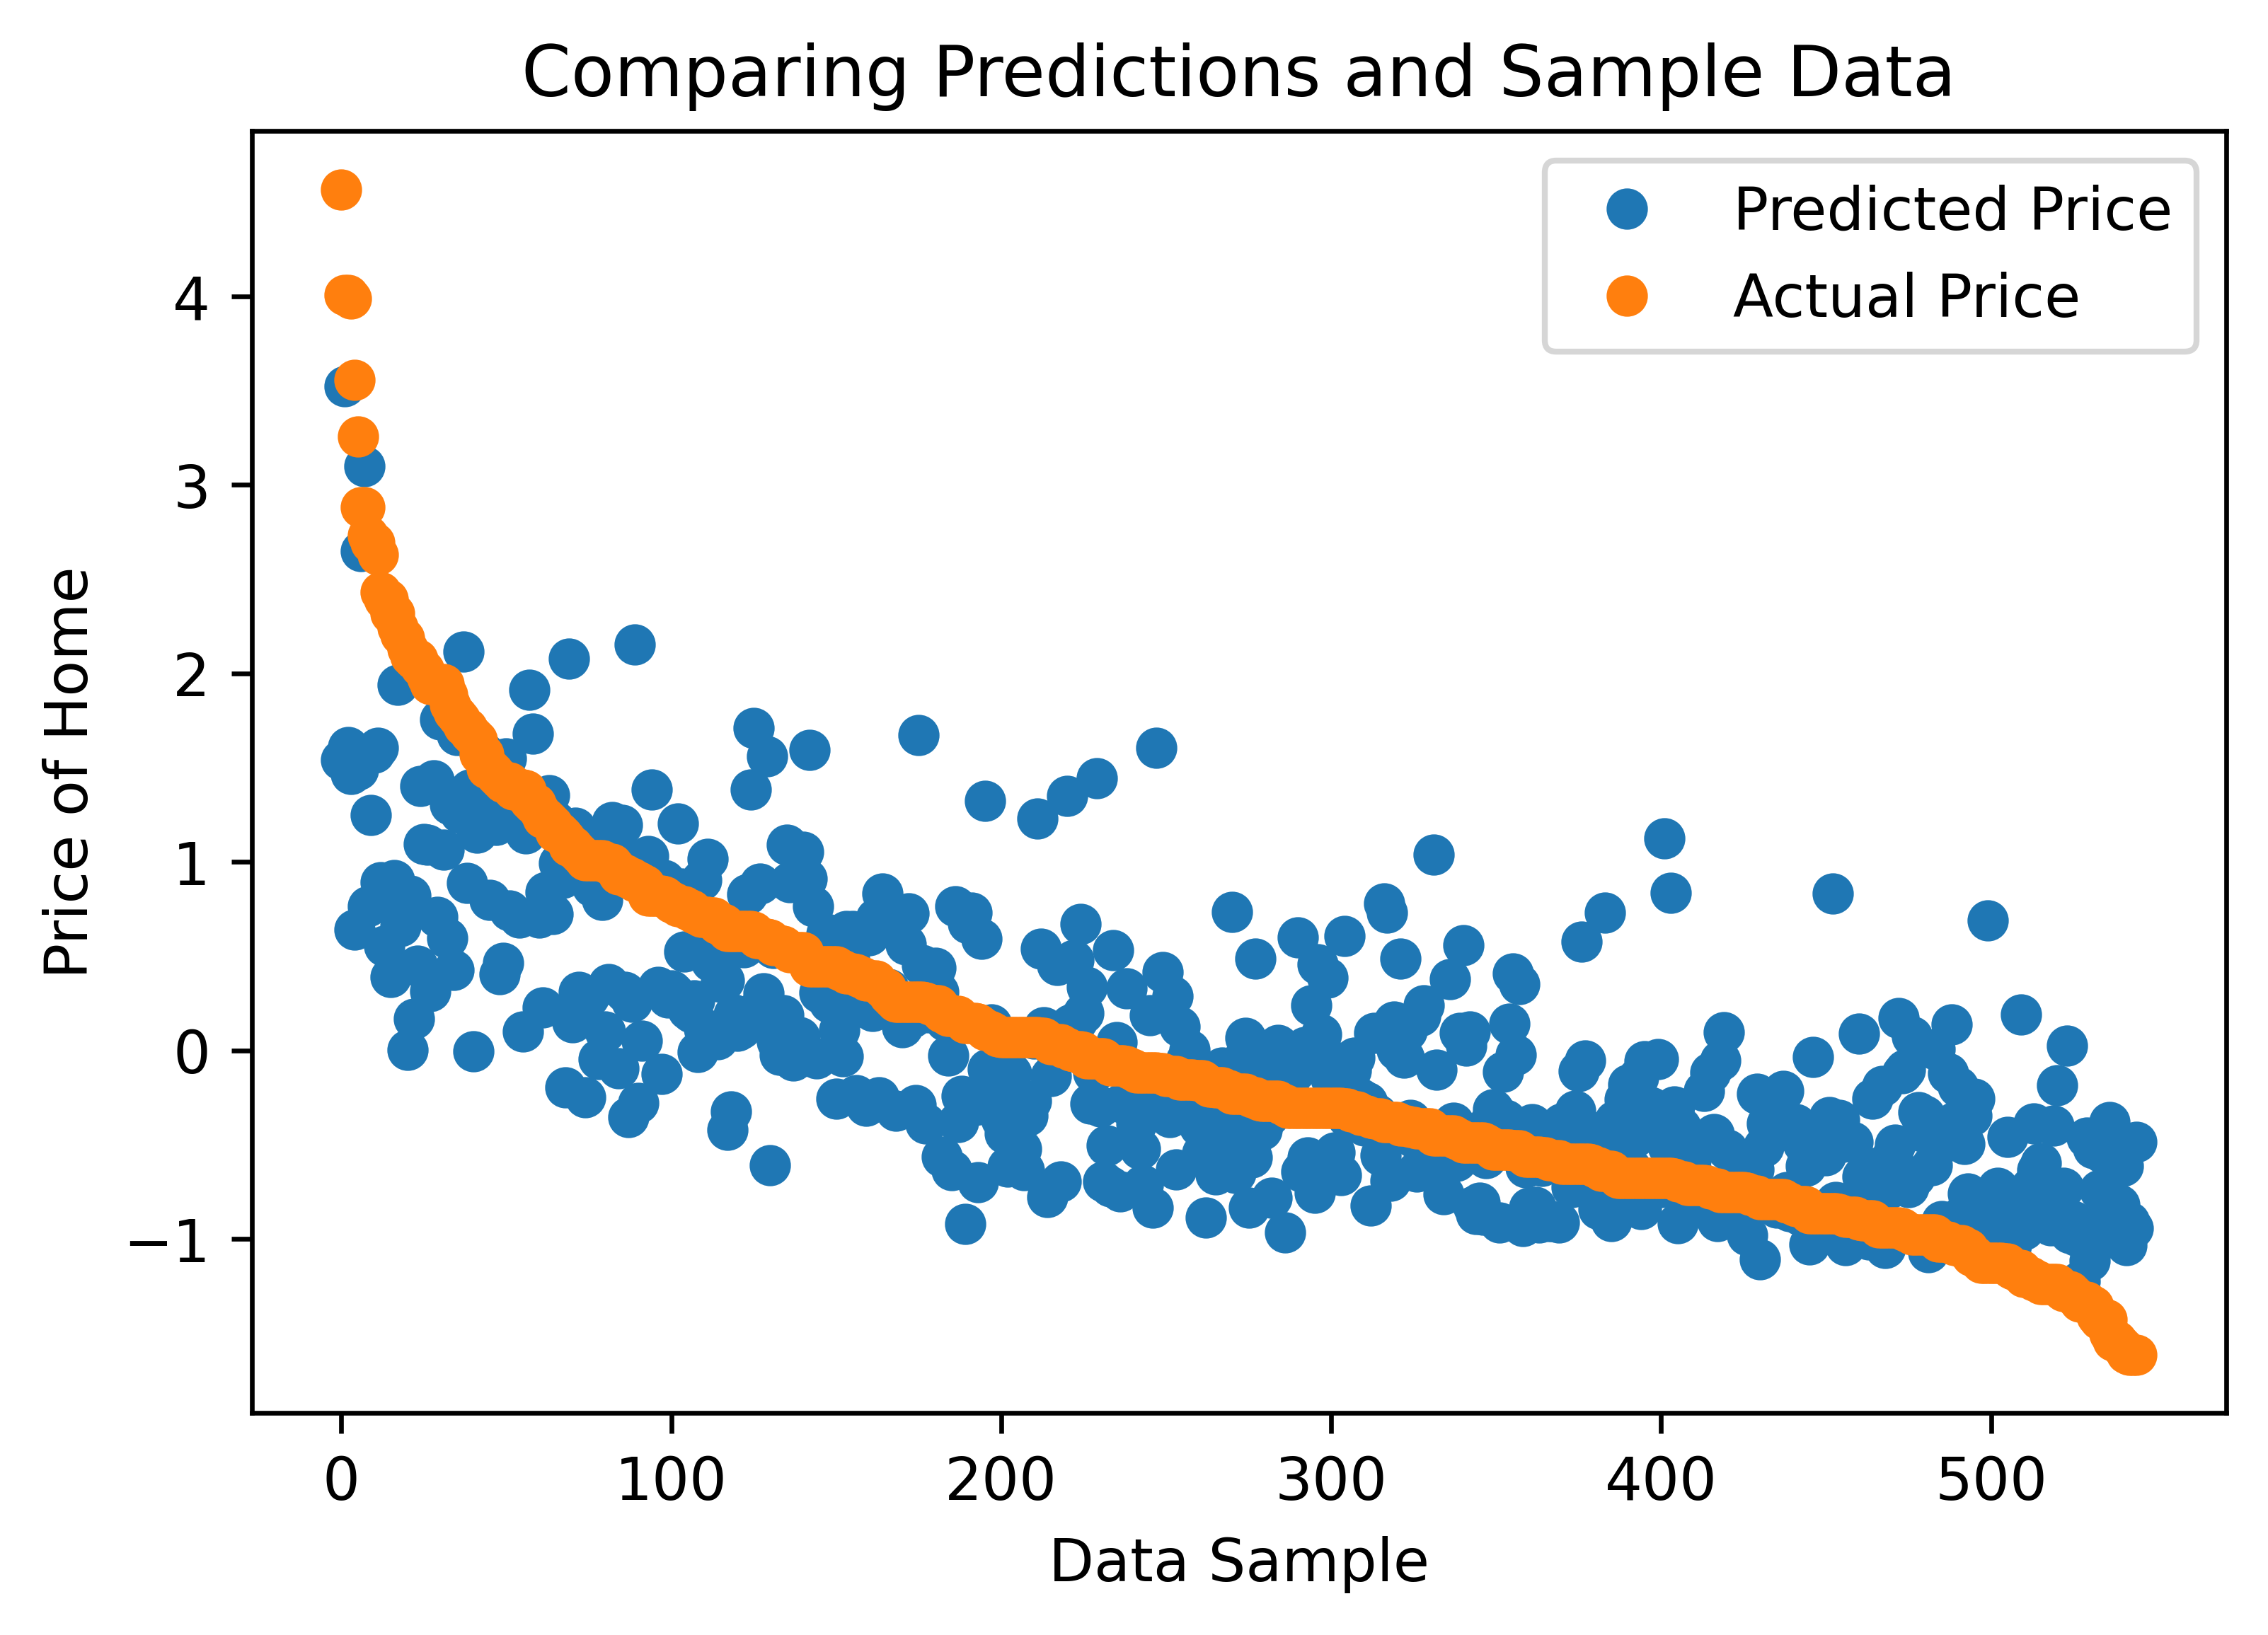

In [17]:
t_p = model(area, bedrooms, bathrooms, stories, parking, *params)
fig = plt.figure(dpi=600)
plt.title("Comparing Predictions and Sample Data")
plt.xlabel("Data Sample")
plt.ylabel("Price of Home")
plt.plot(t_p.detach().numpy(), 'o', label="Predicted Price")
plt.plot(price.numpy(), 'o', label="Actual Price")
plt.legend()